# Passenger survival prediction in Titanic: Data preparation

## import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Eploratory Data Analysis

### Loading Data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### Understanding Data 

In [3]:
train.shape, test.shape

((891, 12), (418, 11))

The columns of train contain the features as well as the target '**Survived**'

In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

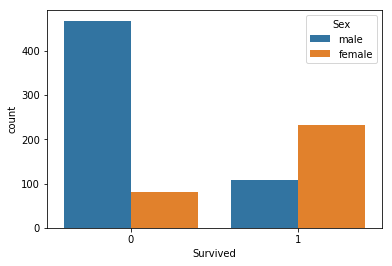

In [6]:
sns.countplot(x='Survived', data=train, hue='Sex')

Gender plays a role in the survival prediction.

Now let's combine the train and the test into data

In [7]:
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True)
data.shape

(1309, 13)

Let's have a look at the type and categories of our variables.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
source         1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 133.0+ KB


Let's now check the head of the data

In [9]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,source
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,train
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,train
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,train
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,train
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,train


### Data manging

**Check missing**

In [10]:
data.isnull().sum()
#data.apply(lambda x: sum(x.isnull())) #another method :p

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
source            0
dtype: int64

**Look at categories of all object variables**

In [11]:
types=data.dtypes
cat_vars=np.array(types[types==object].index)
cat_vars

array(['Cabin', 'Embarked', 'Name', 'Sex', 'Ticket', 'source'], dtype=object)

In [12]:
for var in cat_vars:
    print('\n**********\n Frequency count for variable %s'%var)
    print(data[var].value_counts())


**********
 Frequency count for variable Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
D                  4
F2                 4
B96 B98            4
F4                 4
C78                4
F33                4
C22 C26            4
E101               3
E34                3
B58 B60            3
A34                3
B51 B53 B55        3
C101               3
B49                2
D10 D12            2
B69                2
D15                2
F G73              2
B5                 2
B77                2
E44                2
D28                2
E46                2
B18                2
D37                2
B45                2
C89                2
                  ..
D22                1
B86                1
A7                 1
C30                1
A19                1
B37                1
A24                1
C53                1
B24                1
C97                1
B38                1
E12                1
T                  1
F E69              1
E17    

**Look at the distribution of numerical variables**

In [13]:
data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


**Handling individual variable**

Cabin variable has majority values missing so we'll create a new variable stating whether this is missing or not the we will drop the original column.

In [14]:
data['Missing_cabin'] = data.Cabin.isnull().astype(int)
data[['Cabin', 'Missing_cabin']].head()

,Cabin,Missing_cabin
0,NaN,1
1,C85,0
2,NaN,1
3,C123,0
4,NaN,1


In [15]:
data.drop('Cabin', axis=1, inplace=True)

Ticket has too many unique so we'll drop it.

In [16]:
data.drop('Ticket', axis=1, inplace=True )

Now, we'll impute missing variables. 

We will fill missing 'age' values by mean of all other passengers of the same gender.

In [17]:
data['Age'] = data.groupby('Sex').transform(lambda x: x.fillna(x.mean())).Age

Embarked: impute witht the most common class of embarkation, which is "S" (see value counts)

In [18]:
data.Embarked.fillna('S', inplace=True)

In [19]:
data.Fare.fillna(data['Fare'].median(), inplace=True)

## Feature Engineering

In [20]:
print(data.groupby('Sex').Survived.value_counts(normalize=True))

Sex     Survived
female  1.0         0.742038
        0.0         0.257962
male    0.0         0.811092
        1.0         0.188908
Name: Survived, dtype: float64


Through the comparison on the number of males and females that survived, we can conclude that gender plays a role in the survival prediction.

Let's now explore the role of the age.  We can test this by creating a new column with a categorical variable Child. Child will take the value 1 in cases where age is less than 18, and a value of 0 in cases where age is greater than or equal to 18. 

In [21]:
data['Child'] = (data.Age<18).astype(int)

In [22]:
data[['Age', 'Child']].head()

,Age,Child
0,22.0,0
1,38.0,0
2,26.0,0
3,35.0,0
4,35.0,0


In [23]:
print(data.groupby('Child').Survived.value_counts(normalize=True))

Child  Survived
0      0.0         0.638817
       1.0         0.361183
1      1.0         0.539823
       0.0         0.460177
Name: Survived, dtype: float64


As we can see, age does influence the survival variable. So let's add this comumn to the test set.

A valid assumption is that larger families need more time to get together on a sinking ship, and hence have lower probability of surviving. Family size is determined by the variables SibSp and Parch, which indicate the number of family members a certain passenger is traveling with. So let's add a new variable family_size, which is the sum of SibSp and Parch plus one (the observation itself), to the test and train set.

In [24]:
data['Family_size'] = data['SibSp'] + data['Parch']+1

In [25]:
data.groupby('Survived').Family_size.value_counts()

Survived  Family_size
0.0       1              374
          2               72
          3               43
          6               19
          5               12
          4                8
          7                8
          11               7
          8                6
1.0       1              163
          2               89
          3               59
          4               21
          7                4
          5                3
          6                3
Name: Family_size, dtype: int64

In [26]:
data.drop(['Parch', 'SibSp'], axis=1, inplace=True)

Seemingly the Name column is useless, but we can make use of the title contained in Name. Let's first search all the titles and see their frequency distribution.

In [27]:
data['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [28]:
import re
def search_title(name):
    title=re.findall(r'(\w+\s*\w+)\.', name)
    if len(title)==0:
        return np.nan
    else:
        return title[0]

In [29]:
data['Title']=data.Name.apply(search_title)

In [30]:
data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [31]:
data.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Major             2
Ms                2
Jonkheer          1
Don               1
Sir               1
Dona              1
the Countess      1
Lady              1
Capt              1
Mme               1
Name: Title, dtype: int64

So giving this distribution, we will reduce titles to Mrs, Miss, Mr, Master and rare.

In [32]:
def replace_titles(title):
    if title in ['Dona', 'Lady', 'the Countess','Capt', 'Col', 'Don', 
                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Ms']:
        return 'rare'
    elif title in ['Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'

    else:
        return title

In [33]:

#dict_title=dict.fromkeys(['Dona','Lady', 'the Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer'], 'rare')
#dict_title.update(dict.fromkeys(['Mlle', 'Ms'],'Miss'))
#dict_title.update({'Mme':'Mrs','Mrs':'Mrs', 'Miss':'Miss', 'Mr':'Mr', 'Master':'Master'})
#data["Title"]=data.Title.map(dict_title)
data["Title"]=data.Title.apply(replace_titles)

In [34]:
data['Title'].value_counts()

Mr        757
Miss      262
Mrs       198
Master     61
rare       31
Name: Title, dtype: int64

We'll drop 'Name' column

In [35]:
data.drop('Name', axis=1, inplace=True)

## Final data

In [36]:
data.isnull().sum()

Age                0
Embarked           0
Fare               0
PassengerId        0
Pclass             0
Sex                0
Survived         418
source             0
Missing_cabin      0
Child              0
Family_size        0
Title              0
dtype: int64

In [37]:
data.dtypes

Age              float64
Embarked          object
Fare             float64
PassengerId        int64
Pclass             int64
Sex               object
Survived         float64
source            object
Missing_cabin      int64
Child              int64
Family_size        int64
Title             object
dtype: object

### Numerical encoding

In [38]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
var_to_encode = ['Embarked', 'Sex', 'Title']
for var in var_to_encode:
    data[var]=number.fit_transform(data[var])

### One-hot encoding

In [39]:
data = pd.get_dummies(data, columns=var_to_encode, drop_first=True)

### separating train and test

In [40]:
train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']

In [41]:
train.drop('source',axis=1,inplace=True)
test.drop(['source','Survived'],axis=1,inplace=True)

/home/ibtissem/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ibtissem/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
train['Survived']=train['Survived'].astype(int)

/home/ibtissem/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
train.to_csv('train_modified.csv',index=False)
test.to_csv('test_modified.csv',index=False)